# Clustering and Exploration

This notebook follows the same structure as 'Exploration_Clustering_M.ipynb' and was not created for me, but my sister. It is therefore not commented/described much. 

If you want comments or a notebook that is easier to follow check out the one mentioned above.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spotifuncs import *

In [2]:
path = Path("C:/Users/ms101/OneDrive/DataScience_ML/projects/spotify_app")

In [3]:
with open(path / "client_s.txt") as f:
    content = f.readlines()
content = [x.strip() for x in content]

client_id = content[0]
client_secret = content[1]

In [4]:
with open(path / "usernames.txt") as f:
    usernames = f.readlines()
usernames = [x.strip() for x in usernames]

username = usernames[2]


In [5]:
scope = "user-library-read user-read-recently-played user-top-read playlist-modify-public playlist-read-private playlist-read-collaborative"

redirect_uri = "https://developer.spotify.com/dashboard/applications/4a4e029d299a4241873db8300038bf0a"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)

In [6]:
sp = authenticate(redirect_uri, client_credentials_manager, username, scope, client_id, client_secret)

In [7]:
top_tracks_short = sp.current_user_top_tracks(limit = 50,offset=0,time_range='short_term')
top_tracks_med = sp.current_user_top_tracks(limit = 50,offset=0,time_range='medium_term')
top_tracks_long = sp.current_user_top_tracks(limit = 50,offset=0,time_range='long_term')

#combine the top_tracks
top_tracks_short_df = append_audio_features(create_df_top_songs(top_tracks_short),sp)
top_tracks_med_df = append_audio_features(create_df_top_songs(top_tracks_med),sp)
top_tracks_long_df = append_audio_features(create_df_top_songs(top_tracks_long),sp)

top_tracks_short_df["Timeframe"] = "short term"
top_tracks_med_df["Timeframe"] = "medium term"
top_tracks_long_df["Timeframe"] = "long term"

top_tracks = pd.concat([top_tracks_short_df, top_tracks_med_df, top_tracks_long_df])
top_tracks = top_tracks.reset_index(drop = True)

top_artists_long = sp.current_user_top_artists(limit = 50, time_range = "long_term")
top_artists_med = sp.current_user_top_artists(limit = 50, time_range = "medium_term")
top_artists_short = sp.current_user_top_artists(limit = 50, time_range = "short_term")


artists_short_df = top_artists_from_API(top_artists_short)
artists_med_df = top_artists_from_API(top_artists_med)
artists_long_df = top_artists_from_API(top_artists_long)


artists_df = pd.concat([artists_short_df,artists_med_df,artists_long_df])
artists_df["genres"] = artists_df["genres"].apply(lambda x: ",".join(x))
artists_df.drop_duplicates().reset_index(drop = True)

,name,id,genres,popularity,uri
0,Chase Atlantic,7cYEt1pqMgXJdq00hAwVpT,"electropop,modern rock,pop,rock",72,spotify:artist:7cYEt1pqMgXJdq00hAwVpT
1,Kontra K,4lDiJcOJ2GLCK6p9q5BgfK,"christlicher rap,german hip hop",74,spotify:artist:4lDiJcOJ2GLCK6p9q5BgfK
2,Sabrina Carpenter,74KM79TiuVKeVCqs8QtB0B,"dance pop,electropop,pop,pop dance,post-teen p...",76,spotify:artist:74KM79TiuVKeVCqs8QtB0B
3,Marshmello,64KEffDW9EtZ1y2vBYgq8T,"brostep,edm,pop,pop dance,progressive electro ...",88,spotify:artist:64KEffDW9EtZ1y2vBYgq8T
4,SXTN,0tMFcqLXhtm1Gep20iuIR3,"deep german hip hop,frauenrap,german hip hop",60,spotify:artist:0tMFcqLXhtm1Gep20iuIR3
5,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,"pop,post-teen pop",98,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
6,Juice WRLD,4MCBfE4596Uoi2O4DtmEMz,"chicago rap,melodic rap",97,spotify:artist:4MCBfE4596Uoi2O4DtmEMz
7,Ufo361,5pVRwX5ZQR7hfJ18w8ZYkl,"german cloud rap,german hip hop",78,spotify:artist:5pVRwX5ZQR7hfJ18w8ZYkl
8,Pop Smoke,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,93,spotify:artist:0eDvMgVFoNV3TpwtrVCoTj
9,BLACKPINK,41MozSoPIsD1dJM0CLPjZF,"k-pop,k-pop girl group",89,spotify:artist:41MozSoPIsD1dJM0CLPjZF


In [8]:
top_tracks.drop_duplicates()

,track_name,album,track_id,artist,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Timeframe
0,Swim,Chase Atlantic,3M0lSi5WW79CXQamgSBIjx,Chase Atlantic,228786,74,0.666,0.542,8,-6.429,1,0.0392,0.2700,0.000000,0.0765,0.0771,120.134,short term
1,WHAT TO DO? (feat. Don Toliver),JACKBOYS,4AO1XhrgJczQ9bNVxdfKQe,JACKBOYS,250141,75,0.643,0.594,9,-5.191,0,0.0312,0.0695,0.000015,0.1150,0.1950,118.037,short term
2,Twingo,Twingo,0SkGIhZtmDJ5ggyeDsCNkf,Fynn Kliemann,186984,62,0.619,0.638,2,-5.754,0,0.0906,0.2970,0.000001,0.4400,0.3600,141.967,short term
3,Your Man,Nectar,6Vgtvd7I5yopJdBuxqjBd2,Joji,163758,76,0.785,0.818,7,-8.711,1,0.0990,0.6240,0.149000,0.1490,0.0503,117.980,short term
4,Into It,Chase Atlantic,4HwDCXsMBC7SUdp2WT4MZP,Chase Atlantic,196767,73,0.518,0.572,10,-6.706,0,0.0416,0.0503,0.000024,0.1290,0.2910,130.053,short term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Cyber Sex,Hot Pink,1ghvzmzpx2nnrbx7wtpMgo,Doja Cat,165733,75,0.917,0.657,8,-5.716,1,0.0921,0.3180,0.000004,0.0754,0.8180,131.030,long term
146,Tongue Tied (with YUNGBLUD & blackbear),Tongue Tied (with YUNGBLUD & blackbear),7jzldCBnJjpJM3epzJ85KE,Marshmello,186024,68,0.628,0.821,1,-2.721,0,0.0525,0.0208,0.000000,0.4260,0.4650,93.001,long term
147,Smaller Than This,Smaller Than This,29A7Zz30FbIbvlnHHaJdIx,Sara Kays,208655,37,0.566,0.369,1,-9.181,1,0.0249,0.7930,0.000000,0.1090,0.2050,105.994,long term
148,Falling,Falling,4TnjEaWOeW0eKTKIEvJyCa,Trevor Daniel,159381,87,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.2360,127.085,long term


In [9]:
list(top_tracks_short_df.columns[6:-2])

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

In [10]:
audio_features = list(top_tracks_short_df.columns[6:-2])
audio_features.append("Timeframe")

In [11]:
audio_overtime_df = top_tracks[audio_features].groupby("Timeframe").mean()
audio_overtime_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
Timeframe,,,,,,,,,,
long term,0.66304,0.63300,5.86,-6.61438,0.60,0.092126,0.251583,0.005209,0.170326,0.471144
medium term,0.68136,0.62924,5.18,-6.76458,0.58,0.095004,0.226746,0.004104,0.138608,0.420542
short term,0.64564,0.62832,5.60,-7.24246,0.58,0.112892,0.255412,0.004633,0.147266,0.402806


In [12]:
audio_overtime_df.reset_index(inplace = True)

In [13]:
plot_df = pd.melt(audio_overtime_df, id_vars = "Timeframe",
                           var_name = "audio_feature", value_name = "mean")
plot_df

,Timeframe,audio_feature,mean
0,long term,danceability,0.663040
1,medium term,danceability,0.681360
2,short term,danceability,0.645640
3,long term,energy,0.633000
4,medium term,energy,0.629240
5,short term,energy,0.628320
6,long term,key,5.860000
7,medium term,key,5.180000
8,short term,key,5.600000
9,long term,loudness,-6.614380


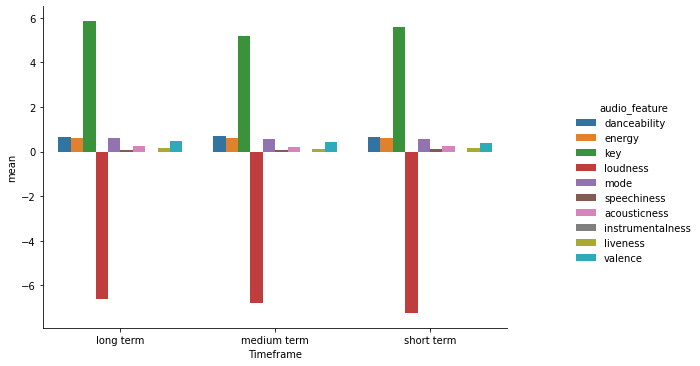

In [14]:
#%matplotlib inline
sns.catplot(data = plot_df, kind = "bar", x = "Timeframe",
            y = "mean", hue = "audio_feature"
)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [15]:
cluster_feat = audio_features[:-1]
cluster_feat

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

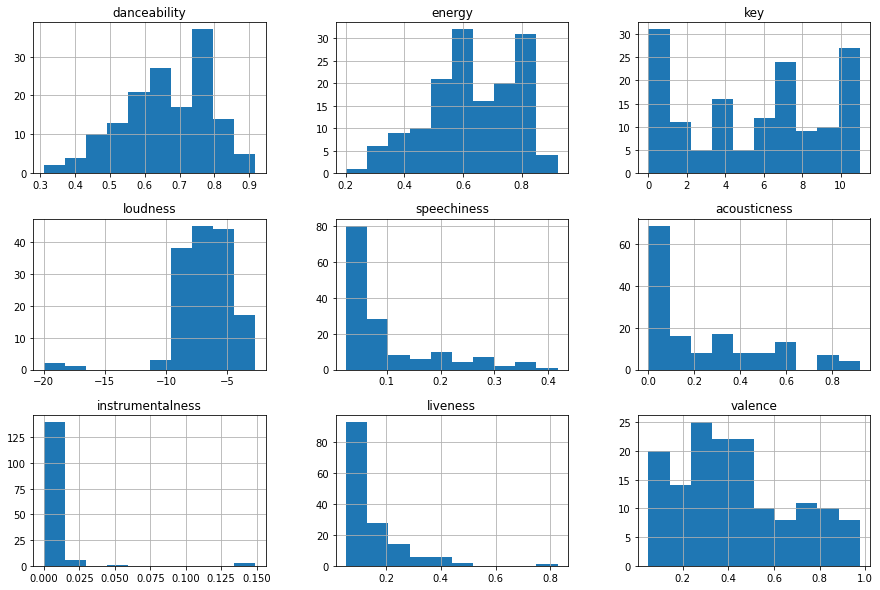

In [16]:
df_cluster = top_tracks[cluster_feat].drop("mode",axis = 1)
df_cluster.hist(figsize= (15,10))

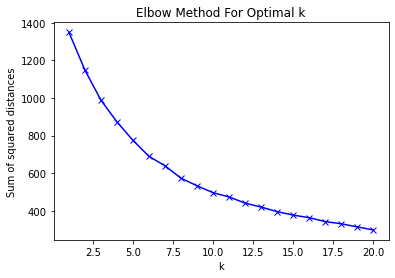

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


ss_dist = []
for k in range(1,21):
    km = KMeans(n_clusters=k,max_iter = 10000 ,random_state=13)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
    
plt.plot(range(1,21), ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



<AxesSubplot:>

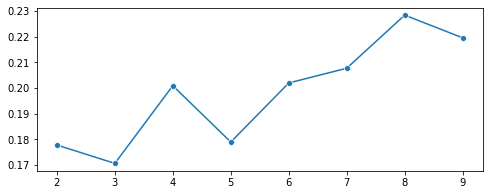

In [18]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
sns.lineplot(x = range(2, 10), y = silhouette_scores,marker="o")

In [19]:
n_cluster = 8
km = KMeans(n_clusters = n_cluster, max_iter = 10000, random_state=13).fit(X)

In [20]:
X_pred = km.predict(X)

In [21]:
X_pred.shape

(150,)

In [22]:
top_tracks["cluster"] = X_pred

In [23]:
for i in range(1,n_cluster+1):
    print("\n",top_tracks[["track_name","artist"]][top_tracks["cluster"] == i].drop_duplicates(), "\n")



                               track_name             artist
0                                   Swim     Chase Atlantic
1        WHAT TO DO? (feat. Don Toliver)           JACKBOYS
4                                Into It     Chase Atlantic
7                                Friends     Chase Atlantic
25      Consume (feat. Goon Des Garcons)     Chase Atlantic
28                             Triggered     Chase Atlantic
40   Jenny (I Wanna Ruin Our Friendship)     Studio Killers
44                        Ayo Technology         Kynda Gray
72                       Einsam zu zweit         Simon Will
99                             Lights Up       Harry Styles
107                           Don’t Play             Halsey
109                            gone girl          iann dior
119                          Reflections  The Neighbourhood
121                             emotions          iann dior
136                                 Easy       Kyd the Band
148                              Falli

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=13)
tsne_results = tsne.fit_transform(X)

df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = km.labels_
df_tsne.head()

,D1,D2,label
0,-0.737240,5.482400,1
1,-1.918965,5.045205,1
2,3.466219,5.717972,5
3,-6.804125,14.493647,4
4,-1.139544,4.065245,1


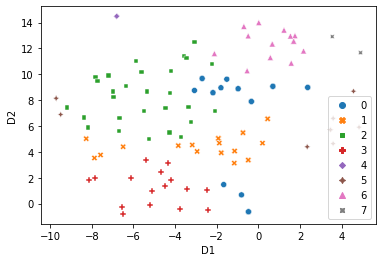

In [25]:
sns.scatterplot(data = df_tsne, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.5160901289554739


array([0.23196155, 0.38447019, 0.51609013])

not enough variance explained for sensible visualisation

In [27]:
tsne3 = TSNE(n_components=3, n_iter=5000, random_state=13, perplexity=50)
tsne_results = tsne3.fit_transform(X)

In [28]:
df_tsne3 = pd.DataFrame(tsne_results)
df_tsne3.columns = ['D1', 'D2', 'D3']
df_tsne3['label'] = km.labels_
df_tsne3.head()

,D1,D2,D3,label
0,-36.391468,212.011520,143.227844,1
1,11.109424,427.900116,2.280091,1
2,615.950684,-196.722839,-107.548912,5
3,-8.540461,-59.122952,630.807251,4
4,306.044891,128.735092,204.142395,1


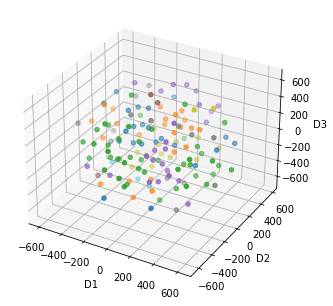

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_tsne3['D1'], df_tsne3['D2'], df_tsne3['D3'],
           c=df_tsne3['label'], cmap='tab10')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.show()

In [30]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel = "rbf", gamma = 0.04)
rbf_pca_results = rbf_pca.fit_transform(X)

df_rbf_pca = pd.DataFrame(rbf_pca_results)
df_rbf_pca.columns = ['D1', 'D2']
df_rbf_pca['label'] = km.labels_
df_rbf_pca.head()

,D1,D2,label
0,0.143631,0.147085,1
1,-0.092131,0.114810,1
2,0.058886,-0.375405,5
3,0.200553,0.004567,4
4,-0.030382,0.094666,1


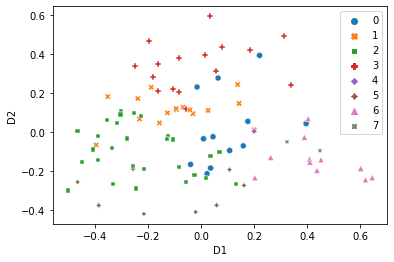

In [31]:
sns.scatterplot(data = df_rbf_pca, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

In [32]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
lle_results = lle.fit_transform(X)

df_lle = pd.DataFrame(lle_results)
df_lle.columns = ['D1', 'D2']
df_lle['label'] = km.labels_
df_lle.head()

,D1,D2,label
0,0.056870,0.000668,1
1,0.056870,-0.005843,1
2,0.057665,-0.314264,5
3,0.056871,-0.017565,4
4,0.056870,-0.012844,1


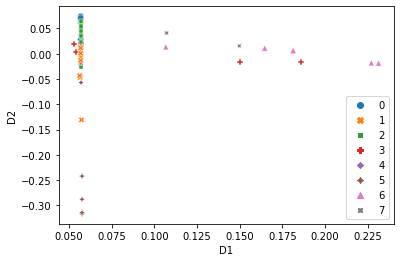

In [33]:
sns.scatterplot(data = df_lle, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

that did not work well.
t-sne seems to be a good solution for visualisation

In [34]:
#average song feature per cluster (what are our clusters representing?)
df_cluster

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.666,0.542,8,-6.429,0.0392,0.2700,0.000000,0.0765,0.0771
1,0.643,0.594,9,-5.191,0.0312,0.0695,0.000015,0.1150,0.1950
2,0.619,0.638,2,-5.754,0.0906,0.2970,0.000001,0.4400,0.3600
3,0.785,0.818,7,-8.711,0.0990,0.6240,0.149000,0.1490,0.0503
4,0.518,0.572,10,-6.706,0.0416,0.0503,0.000024,0.1290,0.2910
...,...,...,...,...,...,...,...,...,...
145,0.917,0.657,8,-5.716,0.0921,0.3180,0.000004,0.0754,0.8180
146,0.628,0.821,1,-2.721,0.0525,0.0208,0.000000,0.4260,0.4650
147,0.566,0.369,1,-9.181,0.0249,0.7930,0.000000,0.1090,0.2050
148,0.785,0.431,10,-8.756,0.0364,0.1230,0.000000,0.0887,0.2360


In [35]:
df_cluster["cluster"] = X_pred
df_cluster.drop(["key","loudness"],axis = 1,inplace = True)

In [36]:
df_radar = df_cluster.groupby("cluster").mean().reset_index()
df_radar

,cluster,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0,0.783409,0.520409,0.136200,0.147486,0.000851,0.130286,0.366000
1,1,0.608478,0.629261,0.053548,0.129898,0.003043,0.134891,0.258804
2,2,0.667000,0.722800,0.060400,0.175155,0.002065,0.116067,0.606222
3,3,0.690333,0.659333,0.252208,0.276746,0.002131,0.097542,0.380375
4,4,0.785000,0.818000,0.099000,0.624000,0.149000,0.149000,0.050300
5,5,0.679214,0.707071,0.051671,0.166687,0.000933,0.423000,0.575429
6,6,0.515062,0.434875,0.052069,0.674125,0.000273,0.142175,0.250075
7,7,0.528000,0.315000,0.049533,0.313067,0.000025,0.211133,0.701000


In [39]:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
from math import pi, ceil

def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

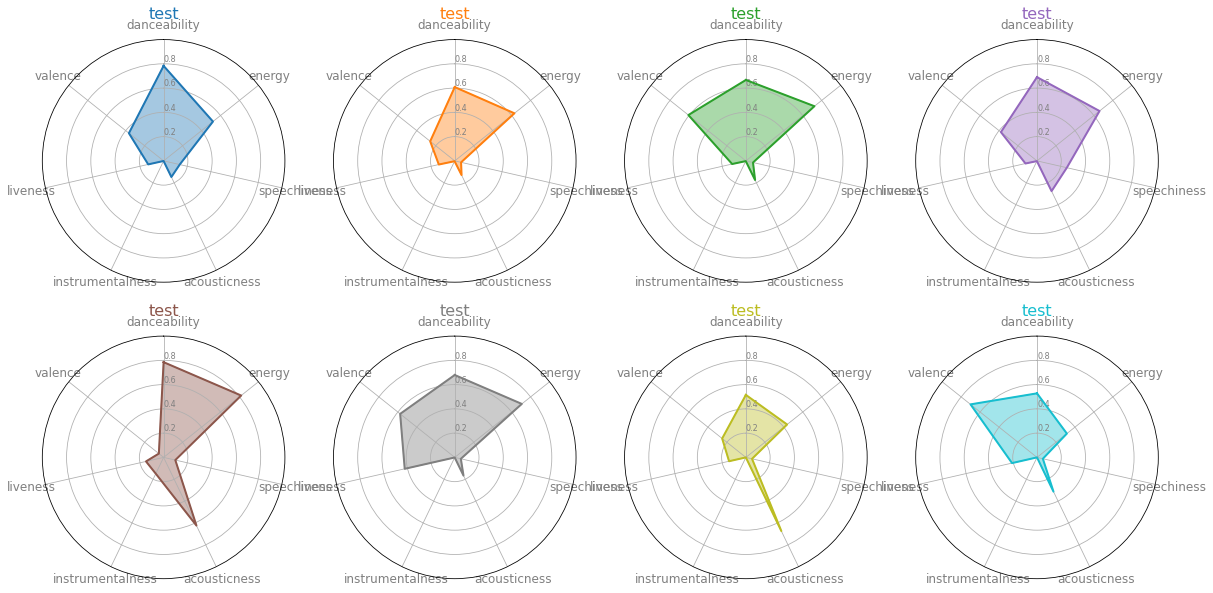

In [40]:
plt.figure(figsize = (20,10))
my_palette = plt.cm.get_cmap("tab10", len(df_radar.index))
title_list = [str(x) for x in range(1,8)]

for row in range(0, len(df_radar.index)):
    make_radar(row=row, title="test", 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))